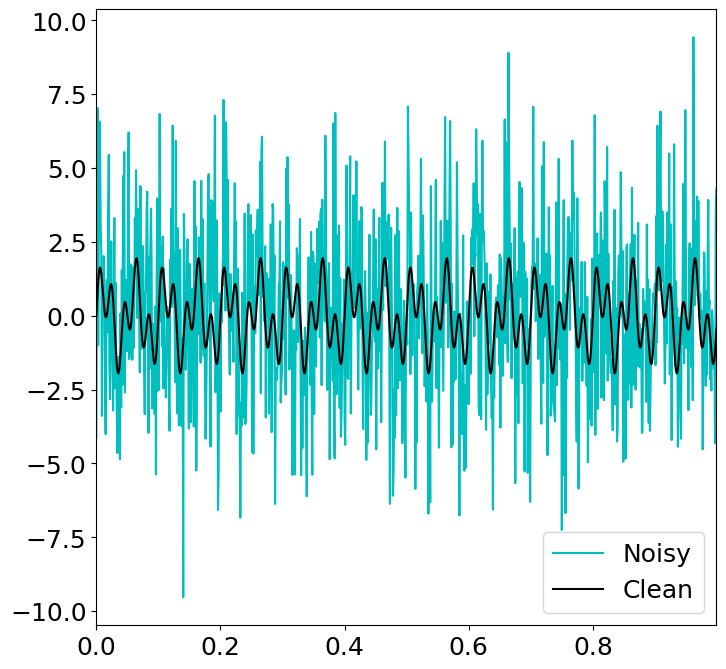

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[8,8]
plt.rcParams.update({"font.size":18})

dt=0.001
t=np.arange(0,1,dt)
f=np.sin(2*np.pi*50*t) +np.sin(2*np.pi*20*t)

f_clean=f
f=f+2.5*np.random.randn(len(t))

plt.plot(t,f,color='c',label="Noisy")

plt.plot(t,f_clean,color='k',label="Clean")
plt.xlim(t[0],t[-1])
plt.legend()

c:\Users\dell\anaconda3\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\dell\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


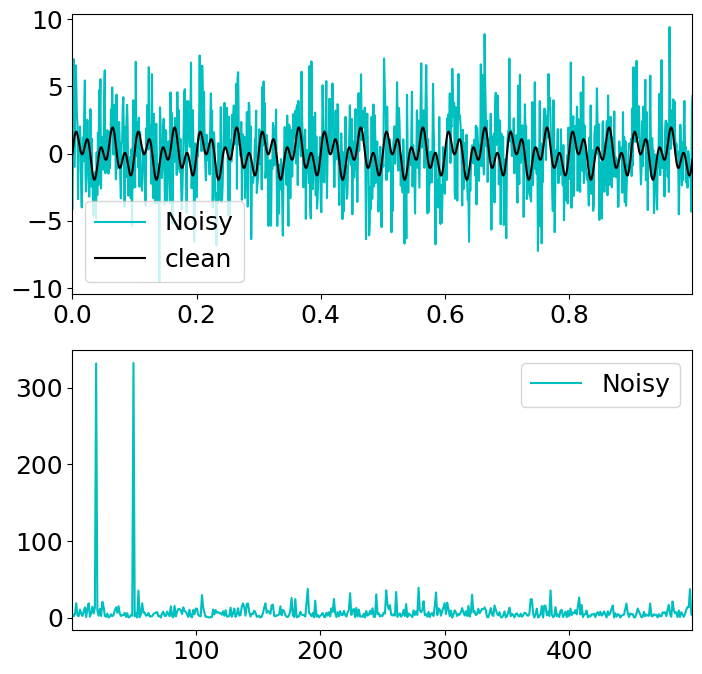

In [8]:
##compute the fast fourier transform(FFT)

n=len(t)
fhat=np.fft.fft(f,n)
PSD=fhat*np.conj(fhat)/n
freq=(1/(dt*n))*np.arange(n)
L=np.arange(1,np.floor(n/2),dtype='int')

fig,axs=plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',label="Noisy")
plt.plot(t,f_clean,color='k', label="clean")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',label="Noisy")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

In [10]:
#Use the PSD to filter out noise
indices=PSD>100
PSDclean=PSD*indices
fhat=indices*fhat
ffilt=np.fft.ifft(fhat)

c:\Users\dell\anaconda3\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\dell\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


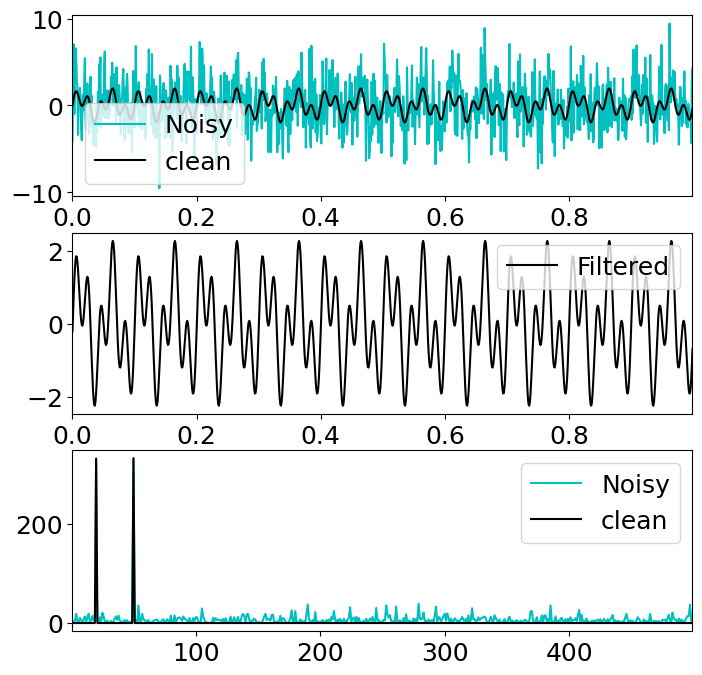

In [11]:
#plots
fig,axs=plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',label="Noisy")
plt.plot(t,f_clean,color='k',label="clean")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color='k',label="Filtered")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c',label="Noisy")
plt.plot(freq[L],PSDclean[L],color='k',label="clean")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()
